### PROBLEMA A RESOLVER
Lo que se busca resolver es que, en base a que caracterísitcas de una canción, hace que esta sea bailable

### EDA

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [7]:
# se crea el dataframe con los datos del archivo .csv
df = pd.read_csv("dataset-of-80s.csv")

In [8]:
# se ven los primeros 5 registros
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Walking Blues,Big Joe Williams,spotify:track:1ZjN5X8LmUB67pWPgimW3B,0.509,0.277,6,-14.323,1,0.0495,0.827,0.00206,0.0756,0.640,101.157,161893,4,68.46530,7,0
1,Suddenly Last Summer,The Motels,spotify:track:4fLIM0B1WwrLux9RdnMvze,0.716,0.753,2,-5.682,1,0.0286,0.162,0.03060,0.0831,0.561,120.141,222000,4,57.71583,11,1
2,Sanctuary,Béla Fleck,spotify:track:3DwlNfiCQSdj0GOxYkR9Rq,0.360,0.542,5,-13.885,1,0.0339,0.368,0.16500,0.1160,0.803,116.831,444907,4,30.34574,17,0
3,The Wild Rover,The Pogues,spotify:track:6JyYNPLalPgGa7XnclF5FO,0.656,0.512,7,-11.872,1,0.0290,0.585,0.00000,0.0720,0.880,97.500,157893,3,50.97022,7,0
4,In The Driver's Seat,John Schneider,spotify:track:6jJi8OXF5qaFdysB6sjWIT,0.642,0.889,2,-5.620,0,0.0494,0.375,0.00000,0.1800,0.764,163.351,162293,4,33.62053,7,1


In [9]:
 # se ven los ultimos 5 registros
df.tail()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
6903,Bachke Rehna Re Baba - Pukar / Soundtrack Version,Kishore Kumar,spotify:track:2wK3g7TTQa9AJMKcuYKbon,0.443,0.589,7,-8.085,1,0.0392,0.552000,0.000000,0.1410,0.963,97.401,384360,4,31.61135,23,0
6904,Tiempos Metálicos,V8,spotify:track:3QaUanfuOovKQ5yNgGOSsz,0.208,0.750,9,-12.945,1,0.1080,0.000134,0.000002,0.0621,0.394,83.467,154827,4,23.71780,8,0
6905,Joy,Teddy Pendergrass,spotify:track:2Qv5EUATFNebcFGq3rN8O6,0.739,0.729,4,-9.694,0,0.0572,0.249000,0.007680,0.0690,0.884,103.339,375652,4,31.31730,13,1
6906,I Wanna Be A Cowboy,Boys Don't Cry,spotify:track:38mEFmht9K7UcpHvS9vtJG,0.749,0.626,0,-12.426,1,0.0393,0.011500,0.567000,0.0558,0.770,142.565,366133,4,27.71571,18,1
6907,Hot In The City,Billy Idol,spotify:track:5LeDMHIZ5YDZ2b1VOcYVcG,0.660,0.897,5,-5.558,1,0.0257,0.003160,0.000023,0.1160,0.670,111.193,219133,4,51.40399,9,1


In [10]:
# se ven los tipos de datos - danceability, track, energy, loudness, speechiness, acousticness, instrumentalness, tempo, duration_ms
df.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

In [11]:
# se ven las filas y columnas
df.shape

(6908, 19)

In [12]:
# del dataframe, eliminando las columnas irrelevantes para el analisis del problema

df.drop(columns = ['artist', 'uri', 'key', 'mode', 'liveness', 'valence', 'sections', 'target'], inplace = True)
df

,track,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo,duration_ms,time_signature,chorus_hit
0,Walking Blues,0.509,0.277,-14.323,0.0495,0.827000,0.002060,101.157,161893,4,68.46530
1,Suddenly Last Summer,0.716,0.753,-5.682,0.0286,0.162000,0.030600,120.141,222000,4,57.71583
2,Sanctuary,0.360,0.542,-13.885,0.0339,0.368000,0.165000,116.831,444907,4,30.34574
3,The Wild Rover,0.656,0.512,-11.872,0.0290,0.585000,0.000000,97.500,157893,3,50.97022
4,In The Driver's Seat,0.642,0.889,-5.620,0.0494,0.375000,0.000000,163.351,162293,4,33.62053
...,...,...,...,...,...,...,...,...,...,...,...
6903,Bachke Rehna Re Baba - Pukar / Soundtrack Version,0.443,0.589,-8.085,0.0392,0.552000,0.000000,97.401,384360,4,31.61135
6904,Tiempos Metálicos,0.208,0.750,-12.945,0.1080,0.000134,0.000002,83.467,154827,4,23.71780
6905,Joy,0.739,0.729,-9.694,0.0572,0.249000,0.007680,103.339,375652,4,31.31730
6906,I Wanna Be A Cowboy,0.749,0.626,-12.426,0.0393,0.011500,0.567000,142.565,366133,4,27.71571


In [13]:
df.dtypes

track                object
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
dtype: object

In [14]:
# análisis / imputación de valores nulos
# se ven los valores nulos 
df.isnull().sum() # no hay valores nulos 

track               0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
dtype: int64

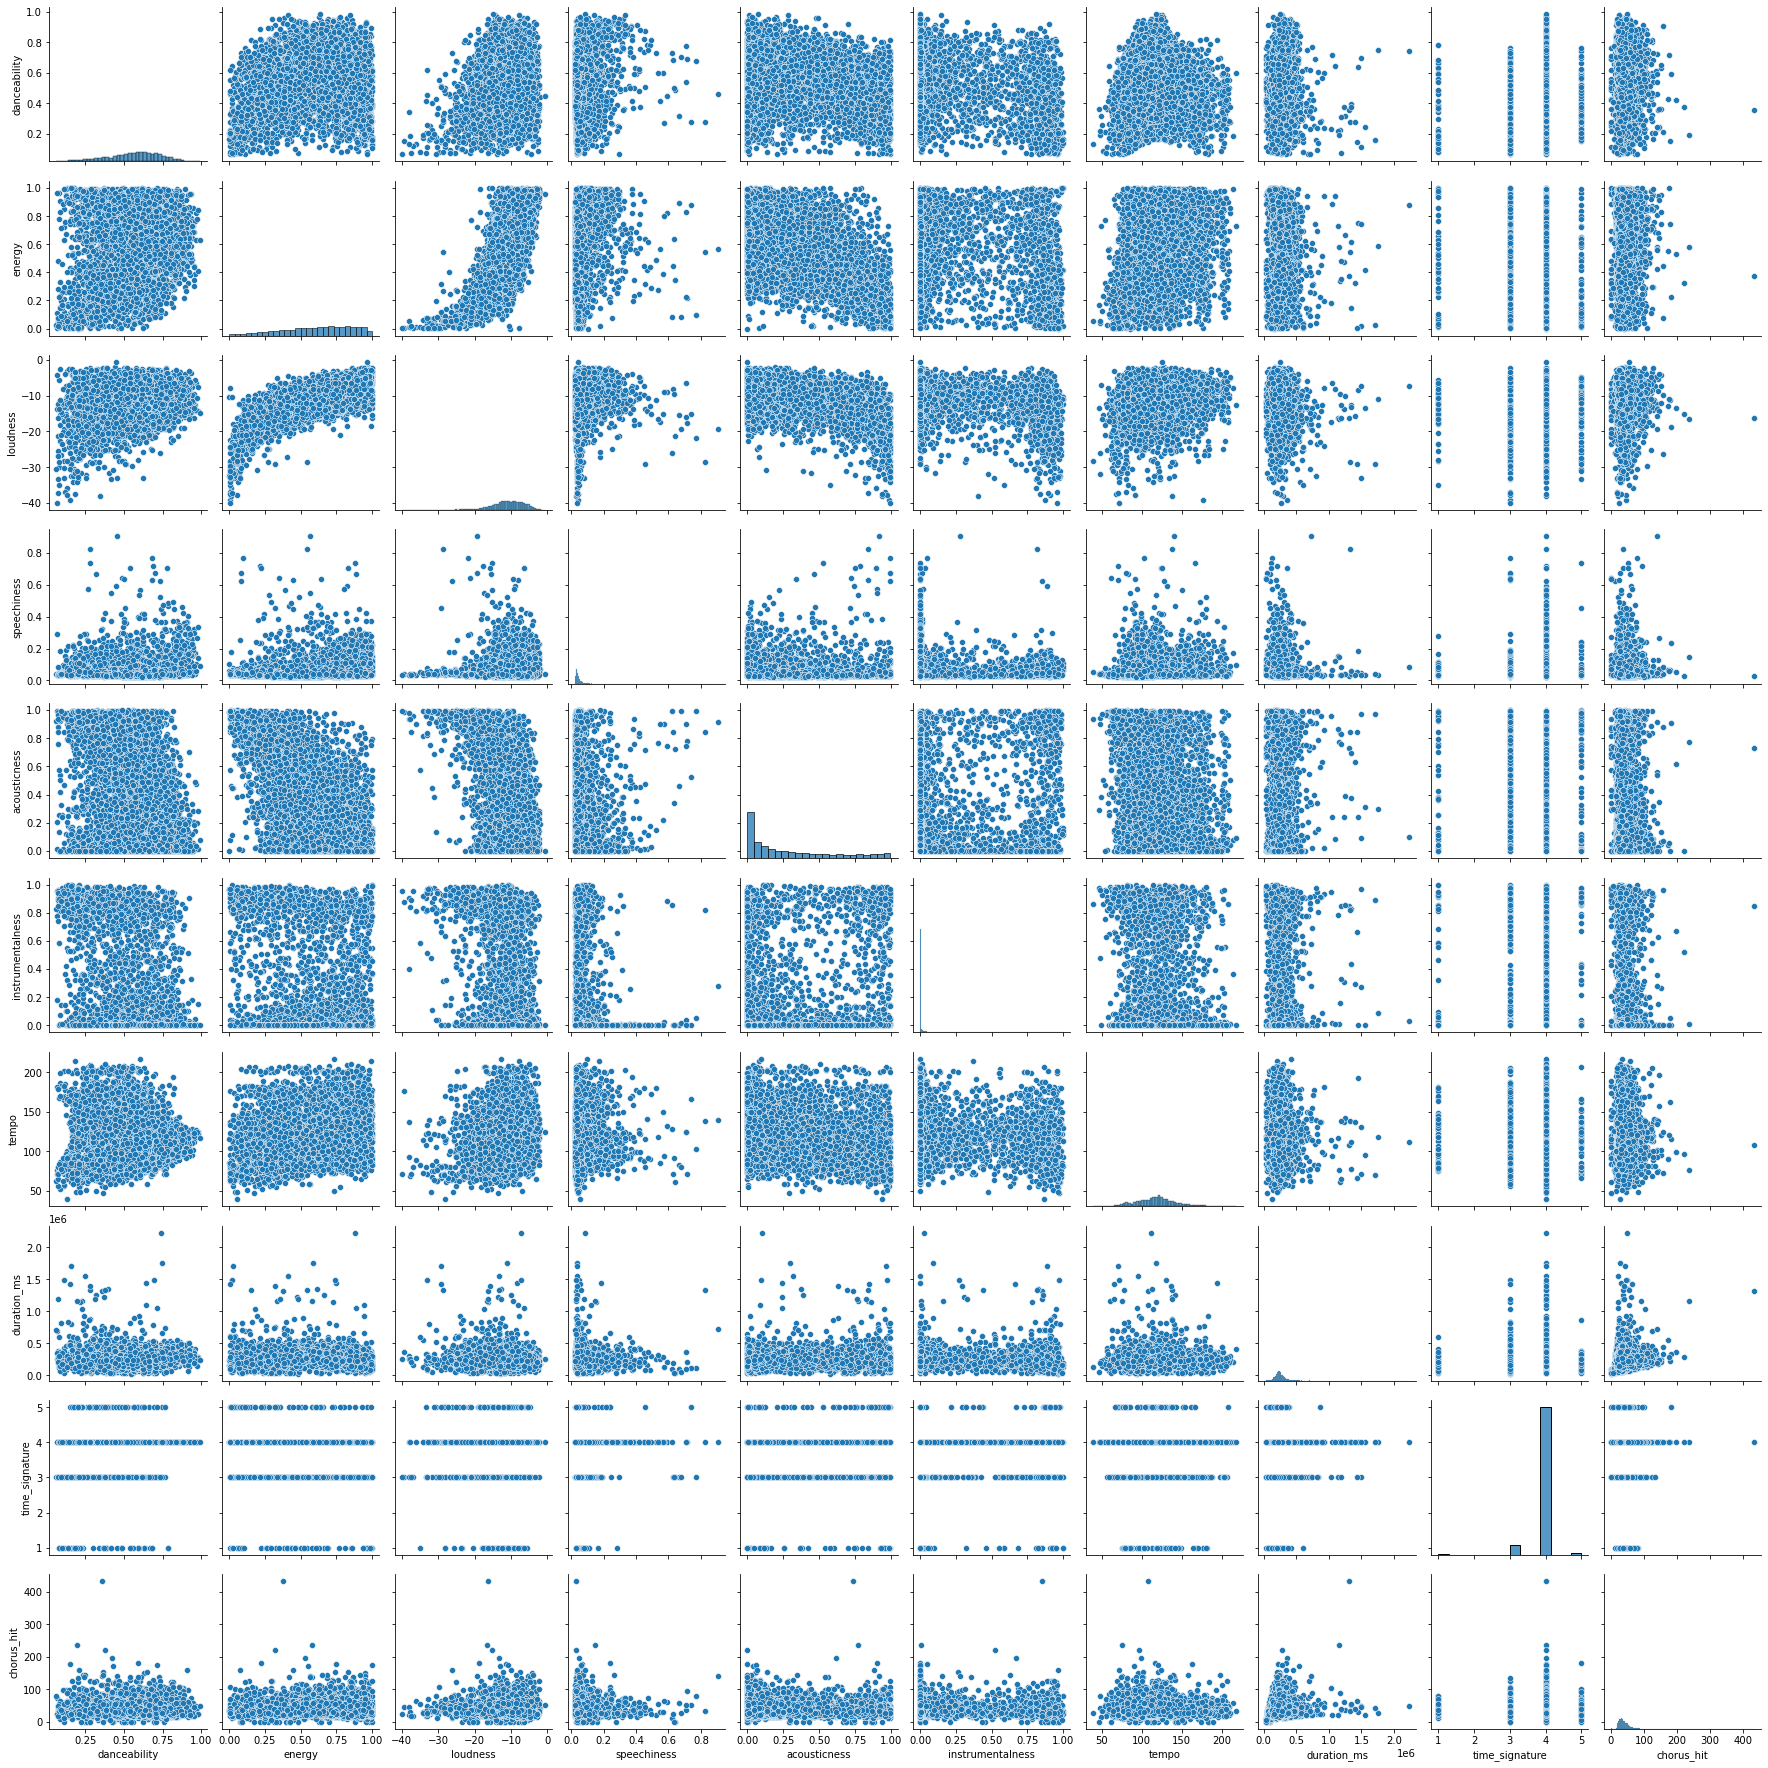

In [15]:
# distribuciones de las variables ?
sns.pairplot(df)

In [16]:
# analisis valores extremos (outliers)
#f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
#f.suptitle('Análisis en base a danceability', fontsize=14)

#sns.boxplot(x="quality", y="alcohol", data=wines,  ax=ax)
#ax.set_xlabel("Calidad del vino",size = 12,alpha=0.8)
#ax.set_ylabel("% de alcohol del vino",size = 12,alpha=0.8)